In [2]:
import os
import pandas as pd
import numpy as np

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#importing dataset
os.chdir('D:/Emre Masaüstü/Python/Kaggle_Telco/')
df = pd.read_csv('Telco-Customer-Churn.csv')

## PREPROCESSING

In [4]:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
df_cat = df.select_dtypes(include = ['object'])
cat=df_cat.columns

In [8]:
#defining a function for changing data type
def change_dtype_cat(x):
    return df[x].astype('category')

In [9]:
for i in cat:
    df[i] = change_dtype_cat(i)

In [10]:
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors='coerce') 
df["SeniorCitizen"] = df["SeniorCitizen"].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null category
gender              7043 non-null category
SeniorCitizen       7043 non-null category
Partner             7043 non-null category
Dependents          7043 non-null category
tenure              7043 non-null int64
PhoneService        7043 non-null category
MultipleLines       7043 non-null category
InternetService     7043 non-null category
OnlineSecurity      7043 non-null category
OnlineBackup        7043 non-null category
DeviceProtection    7043 non-null category
TechSupport         7043 non-null category
StreamingTV         7043 non-null category
StreamingMovies     7043 non-null category
Contract            7043 non-null category
PaperlessBilling    7043 non-null category
PaymentMethod       7043 non-null category
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null cate

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [14]:
#missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df.sort_values(by=['tenure'], ascending=True).head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No


tenure 1 olmadığı için total dolu değil

In [16]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["MonthlyCharges"])

In [17]:
#sum of missing values
df.isnull().sum().sum()

0

# EXPLORATORY DATA ANALYSIS

In [18]:
import matplotlib.pyplot as plt
#TARGET 
labels = df.Churn.value_counts().index
colors = ["cornflowerblue","darkorange"]
explode = [0,0]
sizes = df.Churn.value_counts().values
#visualization
plt.figure(figsize=(5,5))
plt.pie(sizes,colors=colors,explode=explode,labels=labels,autopct="%1.1f%%")
plt.title("Churn")
plt.show()

<Figure size 500x500 with 1 Axes>

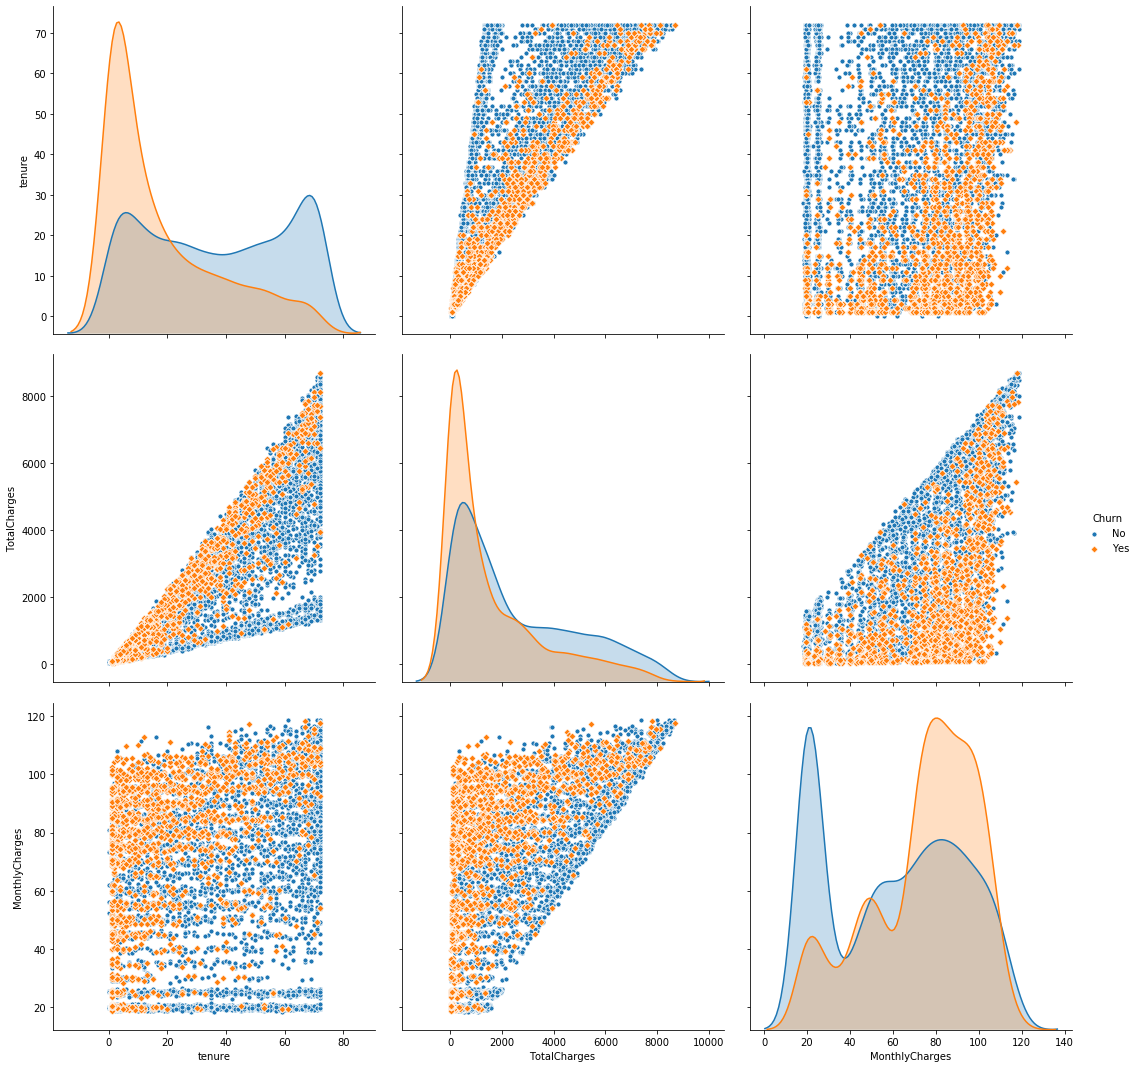

In [19]:
data_for_graph=df[['tenure','TotalCharges','MonthlyCharges','Churn']]
import seaborn as sns
sns.pairplot(data_for_graph, hue = "Churn", markers = ['o','D'], height=5, plot_kws={"s": 25});

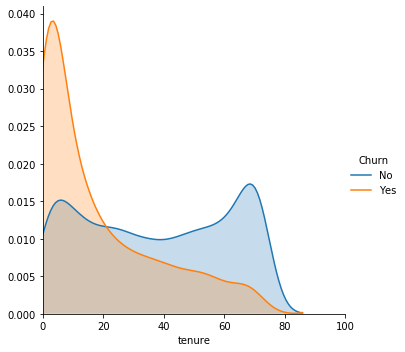

In [20]:
(sns
    .FacetGrid(df,
             hue = 'Churn',
             height = 5,
             xlim = (0,100))
    .map(sns.kdeplot, 'tenure', shade = True)
    .add_legend()
    );

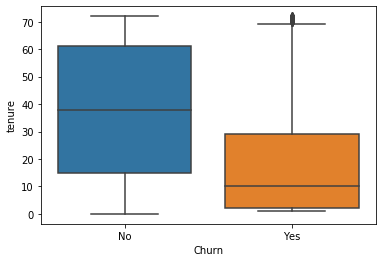

In [21]:
sns.boxplot(y = 'tenure', x = 'Churn', data = df);

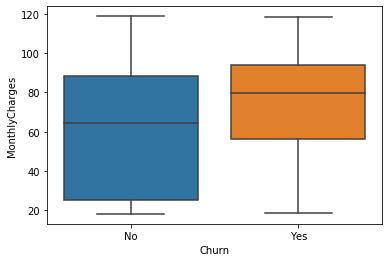

In [22]:
sns.boxplot(y = 'MonthlyCharges', x = 'Churn', data = df);

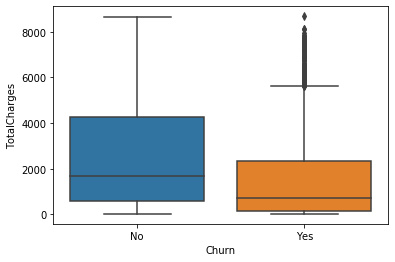

In [23]:
sns.boxplot(y = 'TotalCharges', x = 'Churn', data = df);

In [24]:
#sorting data
df.sort_values(by=['TotalCharges'], ascending=False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
6768,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
5347,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
2187,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No
6118,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
5558,0675-NCDYU,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.40,8543.25,No
2368,6650-BWFRT,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No
2603,0164-APGRB,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.90,8496.70,No
2025,1488-PBLJN,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.85,8477.70,No


In [25]:
#total charges devided to tenure, if tenure is zero than result will be nan
import numpy as np
df["average_charges"]=df.TotalCharges.div(df.tenure.where(df.tenure != 0, np.nan))

In [26]:
df.sort_values(by=['average_charges'], ascending=False).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,average_charges
171,1875-QIVME,Female,0,Yes,No,2,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.40,242.80,Yes,121.400000
4804,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No,120.749180
2187,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No,120.630282
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes,120.622222
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,120.450694


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.000,9.000000,29.000000,55.00000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.250,35.500000,70.350000,89.85000,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.800,398.550000,1394.550000,3786.60000,8684.80
average_charges,7032.0,64.799424,30.185891,13.775,36.179891,70.373239,90.17956,121.40


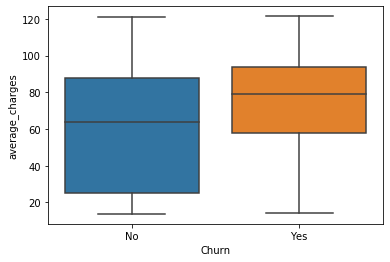

In [28]:
sns.boxplot(y = 'average_charges', x = 'Churn', data = df);

In [29]:
Churn_yes=df.loc[df['Churn'] == 'Yes']
Churn_yes.sort_values(by=['TotalCharges'], ascending=False).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,average_charges
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes,120.622222
1306,0201-OAMXR,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,One year,No,Credit card (automatic),115.55,8127.60,Yes,116.108571
3890,3886-CERTZ,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,One year,Yes,Electronic check,109.25,8109.80,Yes,112.636111
6537,1444-VVSGW,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,One year,No,Credit card (automatic),115.65,7968.85,Yes,113.840714
5581,5271-YNWVR,Male,0,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Electronic check,113.15,7856.00,Yes,115.529412


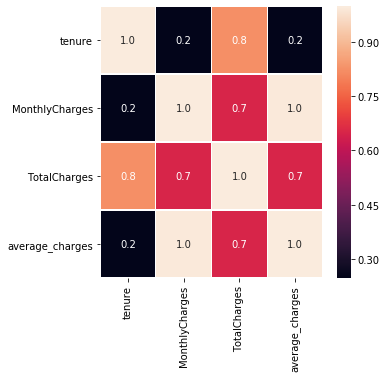

In [30]:
#CORRELATION HEATMAP
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [31]:
#average_charges deleted
df=df.drop(columns=['average_charges'])

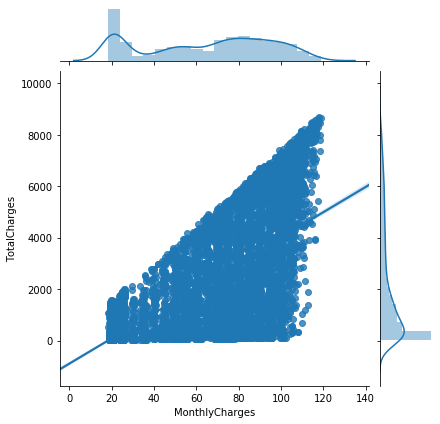

In [32]:
sns.jointplot(x = 'MonthlyCharges', y = 'TotalCharges', data = df, kind = "reg");

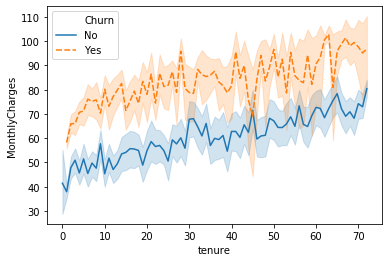

In [33]:
sns.lineplot(x = "tenure", y = "MonthlyCharges", hue = "Churn", style = "Churn", data = df)

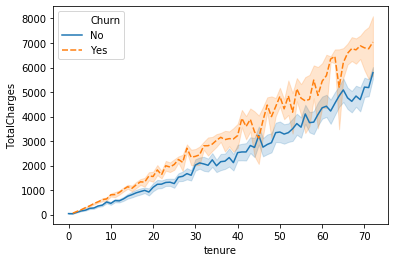

In [34]:
sns.lineplot(x = "tenure", y = "TotalCharges", hue = "Churn", style = "Churn", data = df)

In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


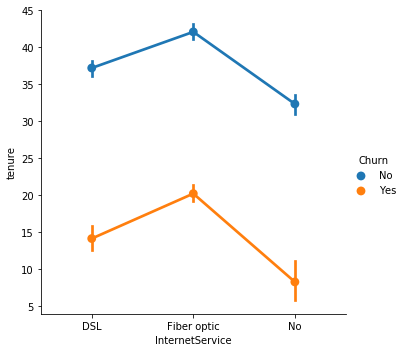

In [36]:
sns.catplot(x="InternetService", y="tenure", hue="Churn", kind="point", data=df);

In [37]:
#PIVOT TABLE
df.groupby(['Churn'],as_index=False).agg({'TotalCharges' :  [np.mean],'MonthlyCharges' : np.mean,'tenure' : np.mean})

,Churn,TotalCharges,MonthlyCharges,tenure
,,mean,mean,mean
0,No,2549.999497,61.265124,37.569965
1,Yes,1531.796094,74.441332,17.979133


In [38]:
#source=https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

churn     = df[df["Churn"] == "Yes"]
not_churn = df[df["Churn"] == "No"]

#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data, layout = layout)
    py.iplot(fig)

In [39]:
#!pip install plotly

In [40]:
#!pip install py

In [41]:
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization

import plotly.graph_objs as go #visualization

for i in cat_cols :
    plot_pie(i)

# STATISTICAL ANALYSIS

In [42]:
df_cont = df.select_dtypes(include = ['int64','float64'])
cont=df_cont.columns

df_cat = df.select_dtypes(include = ['category'])
cat=df_cat.columns

In [43]:
#lets check that if our variables distribution is normal
# Shapiro-Wilk Test
from numpy.random import seed
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
for i in cont:
    stat, p = shapiro(df[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
    if p > alpha:
        print('Sample %s looks Gaussian (fail to reject H0)' %i)
    else:
        print('Sample %s does not look Gaussian (reject H0)' %i)

Statistics=0.904, p=0.000
Sample tenure does not look Gaussian (reject H0)
Statistics=0.921, p=0.000
Sample MonthlyCharges does not look Gaussian (reject H0)
Statistics=0.860, p=0.000
Sample TotalCharges does not look Gaussian (reject H0)


In [44]:
#new df for mann u test
man_u_df = df.copy()

In [45]:
#MANN U TESTİ
#Data Preparation for Mann U Test
for i in cont:
    man_u_df['%s_1' %i] = man_u_df[man_u_df['Churn'] == "Yes"][i]
    man_u_df['%s_0' %i] = man_u_df[man_u_df['Churn'] == "No"][i]

# Mann Whitney U test
from numpy.random import seed
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# compare samples
for i in cont:
    stat, p = mannwhitneyu(man_u_df['%s_1' %i], man_u_df['%s_0' %i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('%s Same distributions (fail to reject H0)' %i)
    else:
        print('%s Different distributions (reject H0)' %i)

Statistics=12014301.000, p=0.000
tenure Different distributions (reject H0)
Statistics=8526713.500, p=0.000
MonthlyCharges Different distributions (reject H0)
Statistics=11150044.000, p=0.000
TotalCharges Different distributions (reject H0)


In [46]:
    from scipy import stats
    #CHI-SQUARE INDEPENDENCE TEST
    contingency_table = pd.crosstab(
        df["gender"],
        df['Churn'],#
        margins = True
    )
    contingency_table
    
    f_obs = np.append(contingency_table.iloc[0][0:2].values, contingency_table.iloc[1][0:2].values)
    f_obs
    
    row_sums = contingency_table.iloc[0:2,2].values
    row_sums
    
    col_sums = contingency_table.iloc[2,0:2].values
    col_sums
    
    total = contingency_table.loc['All', 'All']
    
    f_expected = []
    for j in range(2):
        for i in col_sums:
            f_expected.append(i*row_sums[j]/total)
    f_expected
    
    dof = (len(row_sums)-1)*(len(col_sums)-1)
    print("Degrees of Freedom: {}".format(dof))
    
    f_obs = np.array([contingency_table.iloc[0][0:2].values,
                      contingency_table.iloc[1][0:2].values])
    f_obs
    
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    nl = "\n"
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    
    alpha = 0.05
    if p < alpha:
        print('gender target değişkene göre anlamlı fark gösterir')
    else:
        print('gender target değişkene göre anlamlı fark göstermez')
        
    contingency_table/contingency_table.loc["All"] #cross tab

Degrees of Freedom: 1
Chi2 value= 0.522366503358827
p-value= 0.9712873885521255
Degrees of freedom= 4

gender target değişkene göre anlamlı fark göstermez


Churn,No,Yes,All
gender,,,
Female,0.492656,0.502408,0.495244
Male,0.507344,0.497592,0.504756
All,1.000000,1.000000,1.000000


# MODEL PREPERATION

In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
#PREPARING CATEGORICAL VARIABLES
df_cat = df.select_dtypes(include = ['category'])
#Churn değişken olarak girmeyecektir
df_cat=df_cat.drop(columns=['Churn','customerID'])
df_cat_cols=df_cat.columns

df_cont = df.select_dtypes(include = ['int64','int32','float64'])

In [49]:
df_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [50]:
#DUMMY CATEGORICAL VARIABLES
for i in df_cat: 
    df_cat = pd.concat([df_cat,pd.get_dummies(df_cat[str(i)],\
                                            drop_first=True,prefix=str(i))],axis=1)
df_cat = df_cat.drop(columns=df_cat_cols)
features = pd.concat([df_cont,df_cat],axis=1)
X=features

df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})
y= df['Churn']

In [51]:
# Scaling continuous variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [52]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.472222,0.385075,0.215867,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.027778,0.354229,0.010310,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.625000,0.239303,0.210241,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.027778,0.521891,0.015330,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [53]:
#!pip install Boruta

In [54]:
#FEATURE SELECTION WITH BORUTA ALGORITHM
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
 
# Random Forests for Boruta 
rf_boruta = RandomForestClassifier(n_estimators=200, n_jobs=4, class_weight='balanced', max_depth=6)
# Perform Boruta
boruta_selector = BorutaPy(rf_boruta, n_estimators='auto', verbose=2)
boruta_selector.fit(X.values, y.values.ravel())

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	12
Iteration: 	9 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	12
Iteration: 	10 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	12
Iteration: 	11 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	12
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	12
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	12
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	12
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	12
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	2
Reject

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=6,
                                          max_features='auto',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=97, n_jobs=4,
                                          oob_score=False,
                                          random_state=<mtrand.RandomState object at 0x0000026D01BF21F8>,
                                          verbose=0, warm_start=False),
         max_ite

In [55]:
print("Num Features: %s" % (boruta_selector.n_features_))
print("Feature Ranking: %s" % (boruta_selector.ranking_))

Num Features: 16
Feature Ranking: [ 1  1  1 15  8  4  6 13 14 10  1  1  1  1  1  3  1  4  1  1  1 12  1 10
  1  1  2  7  1 10]


In [56]:
#?boruta_selector

In [57]:
#array to dataframe
rank=boruta_selector.ranking_
ranking=pd.DataFrame(rank, columns=['ranking']) 

column=X.columns
columns=pd.DataFrame(column, columns=['columns']) 

#merge dataframes
boruta_result = pd.concat([columns, ranking], axis=1, sort=False)
#sorting
boruta_result.sort_values(by=['ranking'], ascending=True)

,columns,ranking
0,tenure,1
25,Contract_Two year,1
24,Contract_One year,1
22,StreamingMovies_No internet service,1
20,StreamingTV_No internet service,1
19,TechSupport_Yes,1
18,TechSupport_No internet service,1
16,DeviceProtection_No internet service,1
28,PaymentMethod_Electronic check,1
13,OnlineSecurity_Yes,1


In [58]:
#important features
boruta_ranking_1=boruta_result.loc[boruta_result['ranking'] == 1]
boruta_ranking_1["columns"]

#dataframe to list
boruta_selected_features = boruta_ranking_1["columns"].tolist()
boruta_selected_features

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Electronic check']

In [59]:
X = X[boruta_selected_features]

In [60]:
#SPLITTING THE DATASET INTO THE TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# MODELLING

In [61]:
#source= https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction
import plotly.tools as tls#visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

cols    = X.columns

#Function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic 
                                 #regression,features for tree based models)

#threshold_plot - if True returns threshold plot for model

   
def prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not Churn","Churn"],
                        y = ["Not Churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)

In [62]:
logistic_reg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

prediction(logistic_reg,X_train, X_test, y_train, y_test,cols,"coefficients",threshold_plot = True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.66      0.54      0.60       574

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy   Score :  0.8012304779933743
Area under curve :  0.7204449696961464 



C:\Users\emrem\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [63]:
from sklearn.svm import SVC
SVM  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)
prediction(SVM,X_train, X_test, y_train, y_test,cols,"coefficients",threshold_plot = True)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.65      0.52      0.58       574

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113

Accuracy   Score :  0.7936583057264552
Area under curve :  0.7092386567140525 



C:\Users\emrem\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [64]:
#!pip install xgboost

In [65]:
from xgboost import XGBClassifier

xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)
prediction(xgb,X_train, X_test, y_train, y_test,cols,"features",threshold_plot = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1539
           1       0.61      0.51      0.56       574

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.70      2113
weighted avg       0.77      0.78      0.77      2113

Accuracy   Score :  0.7780407004259347
Area under curve :  0.6952402460532542 



C:\Users\emrem\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [66]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 1000, criterion = 'gini', random_state = 0,max_depth = 9)

prediction(random_forest,X_train, X_test, y_train, y_test,cols,"features",threshold_plot = True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.66      0.52      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy   Score :  0.7974443918599148
Area under curve :  0.7118377470324411 



C:\Users\emrem\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# MODEL PERFORMANCE

In [67]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
import plotly.figure_factory as ff#visualization

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(logistic_reg,X_train, X_test, y_train, y_test,
                      "Logistic Regression")
model2 = model_report(SVM,X_train, X_test, y_train, y_test,
                      "SVM")
model3 = model_report(xgb,X_train, X_test, y_train, y_test,
                      "XGBoosting")
model4 = model_report(random_forest,X_train, X_test, y_train, y_test,
                      "Random Forest")


#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

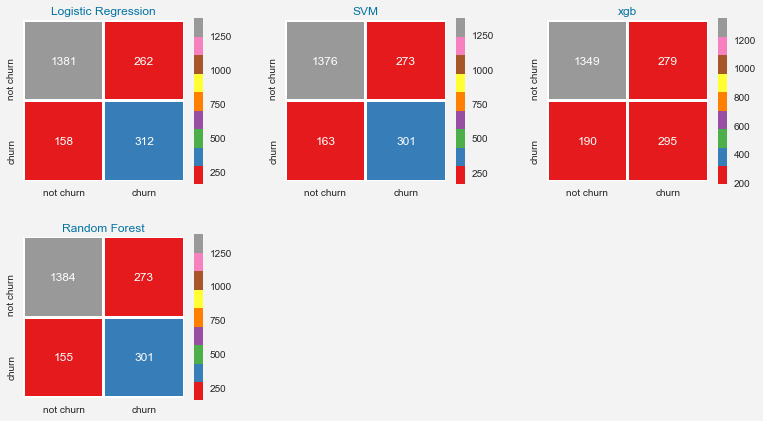

In [69]:
import itertools
lst    = [logistic_reg,SVM,xgb,random_forest]

length = len(lst)

mods   = ['Logistic Regression','SVM','xgb','Random Forest']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(X_test)
    conf_matrix = confusion_matrix(predictions,y_test)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

In [70]:
#PREDICTING THE RESULTS
y_pred_logit = logistic_reg.predict(X)
y_pred_score = logistic_reg.predict_proba(X)

#array to dataframe
y_pred_logit = pd.DataFrame(y_pred_logit)
y_pred_logit.columns = ["Prediction"]
y_pred_score = pd.DataFrame(y_pred_score)
y_pred_score.columns = ["Score_0","Score_1"]
#CONCAT UYE_ID AND ITS PREDICTION
pred = pd.concat([df["customerID"],y_pred_logit,y_pred_score],axis=1)

# Generate Submission File 
submission = pd.DataFrame({
        "UYE_ID": pred["customerID"],
        "Score": pred["Score_1"],
        "Prediction": pred["Prediction"]
    })
submission.to_csv("D:/Emre Masaüstü/Python/Kaggle_Telco/Churn_Skore.csv", index=False)